In [425]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

## You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [426]:
df = pd.read_excel(r'C:/Users/z0126520/Documents/Python/GL/Project_ML/Election_Data.xlsx')

# 1.1 Read the dataseet. Descrie the data briefly. Interpret the inferences for each. Initial steps like head(), .info(), Data Types, etc. Null values check, summary stats, skewness must be discussed.

In [427]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,Unnamed: 10
0,1,Labour,43,3,3,4,1,2,2,female,1.0
1,2,Labour,36,4,4,4,4,5,2,male,2.0
2,3,Labour,35,4,4,5,2,3,2,male,NaN
3,4,Labour,24,4,2,2,1,4,0,female,NaN
4,5,Labour,41,2,2,1,1,6,2,male,NaN


In [428]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,Unnamed: 10
1520,1521,Conservative,67,5,3,2,4,11,3,male,NaN
1521,1522,Conservative,73,2,2,4,4,8,2,male,NaN
1522,1523,Labour,37,3,3,5,4,2,2,male,NaN
1523,1524,Conservative,61,3,3,1,4,11,2,male,NaN
1524,1525,Conservative,74,2,3,2,4,11,0,female,NaN


In [429]:
df.shape

(1525, 11)

In [430]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [431]:
df.drop('Unnamed: 10', axis=1, inplace=True)

In [432]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [434]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [435]:
df.duplicated().sum()

8

In [436]:
df[df.duplicated(keep='first')]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [437]:
df.drop_duplicates(keep='first', inplace=True)

In [438]:
for i in df.columns:
    if df[i].dtype == 'int64':
        print('Skewness of {} = {}'.format(i,df[i].skew()))

Skewness of age = 0.13979987012068112
Skewness of economic.cond.national = -0.23847421478161793
Skewness of economic.cond.household = -0.14414766882077137
Skewness of Blair = -0.5395141989831328
Skewness of Hague = 0.1461913444629453
Skewness of Europe = -0.14189094981032258
Skewness of political.knowledge = -0.4229276205374301


# 1.2 Perform EDA (Check the null values, Data Types, shape, univariate and Bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3pts) Distribution plots (histogram) or simila plots for the continuous columns. Box plots, correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

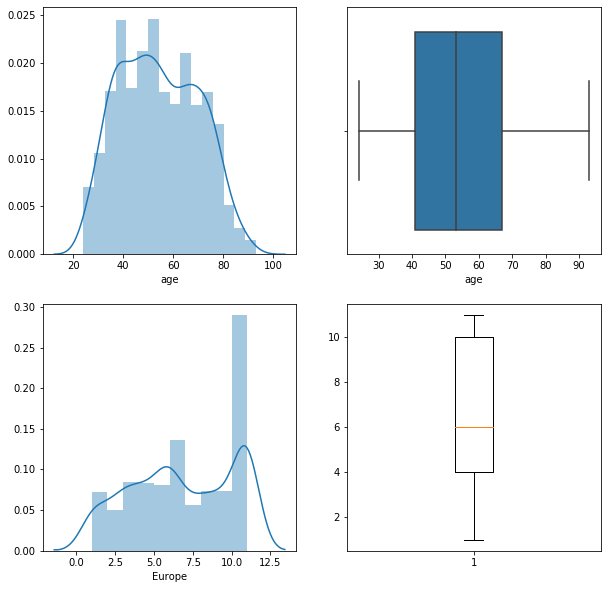

In [439]:
#univariate analysis for continuous columns
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(df['age']);
plt.subplot(222)
sns.boxplot(df['age']);
plt.subplot(223)
sns.distplot(df['Europe']);
plt.subplot(224)
plt.boxplot(df['Europe']);

add inferences in report

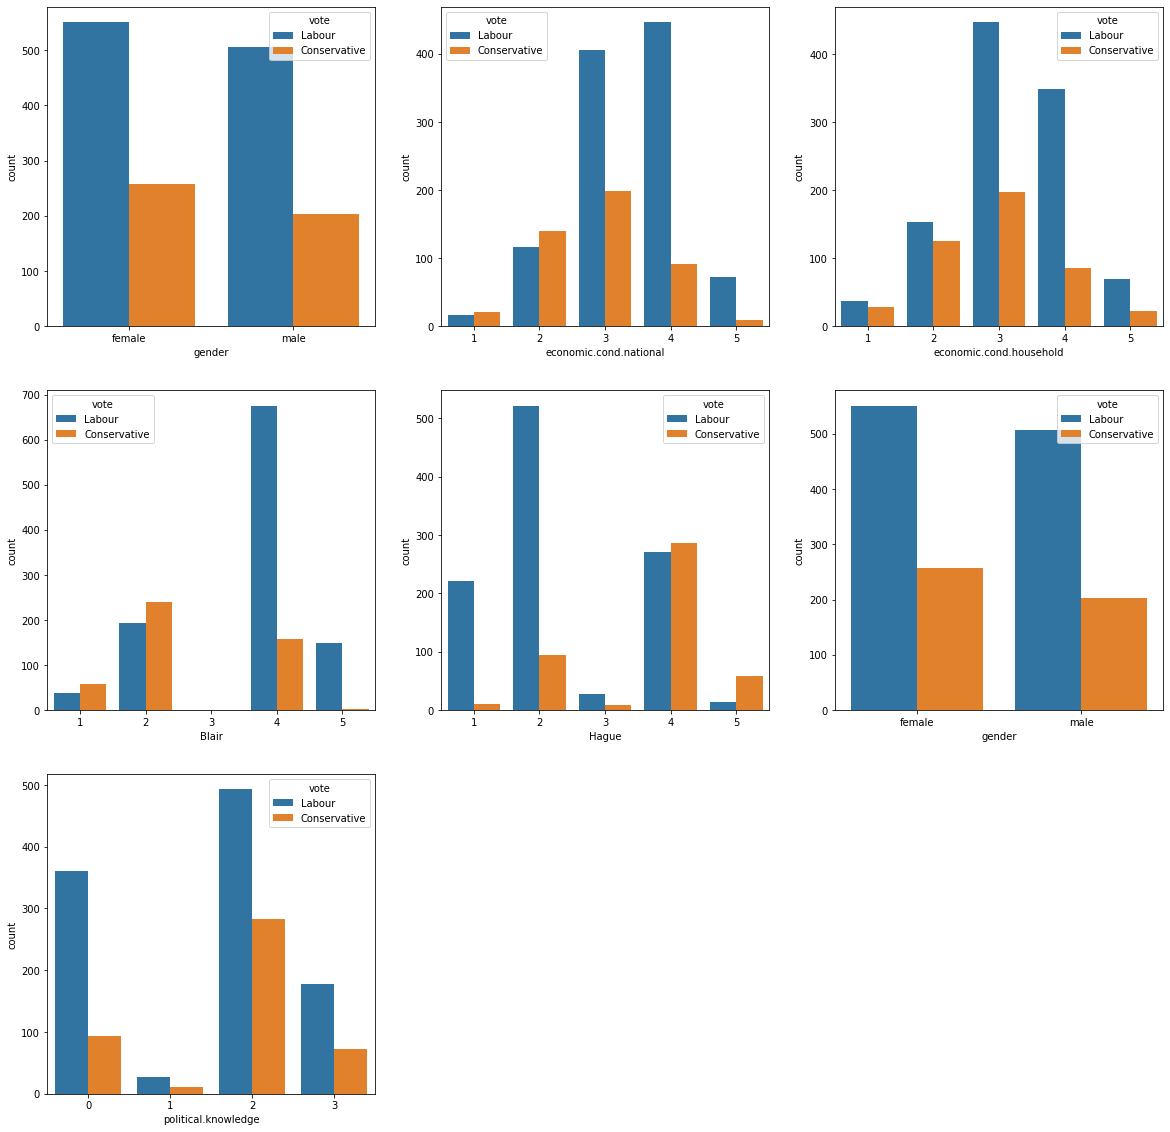

In [440]:
#Univariate analysis for categorical variables
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.countplot(df['gender'],hue=df['vote'])
plt.subplot(332)
sns.countplot(df['economic.cond.national'],hue=df['vote'])
plt.subplot(333)
sns.countplot(df['economic.cond.household'],hue=df['vote'])
plt.subplot(334)
sns.countplot(df['Blair'],hue=df['vote'])
plt.subplot(335)
sns.countplot(df['Hague'],hue=df['vote'])
plt.subplot(336)
sns.countplot(df['gender'],hue=df['vote'])
plt.subplot(337)
sns.countplot(df['political.knowledge'],hue=df['vote'])


In [441]:
def univariateAnalysis_numeric(column,nbins):
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    sns.distplot(df[column],kde=True,color='g')
    plt.subplot(222)
    ax=sns.boxplot(x=df[column])
    plt.show()

In [442]:
df['vote'] = pd.Categorical(df['vote']).codes
df['gender']=pd.Categorical(df['gender']).codes

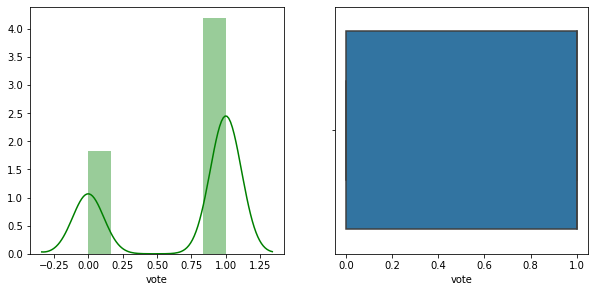

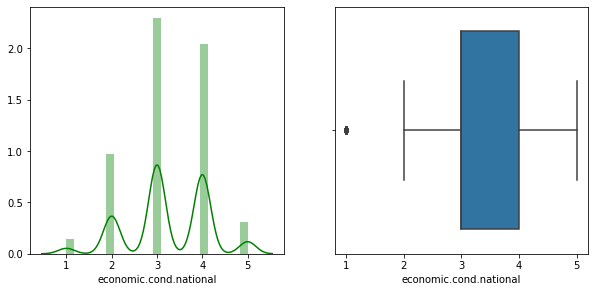

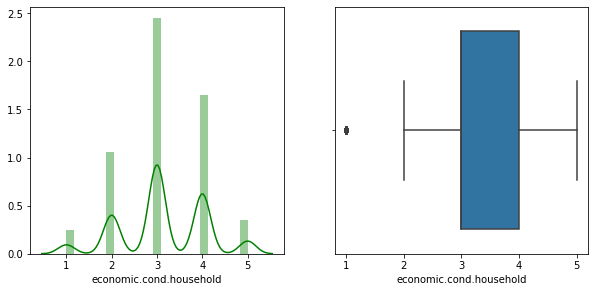

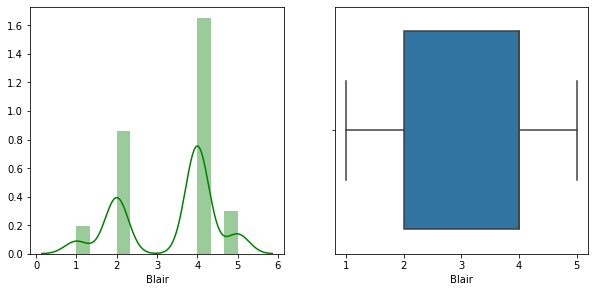

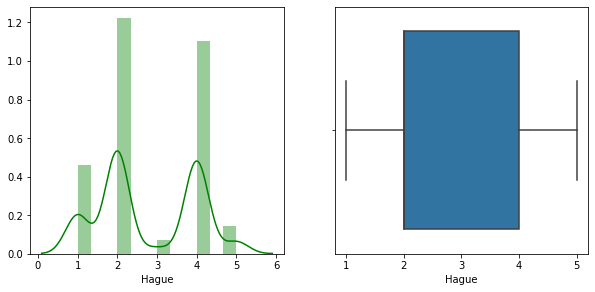

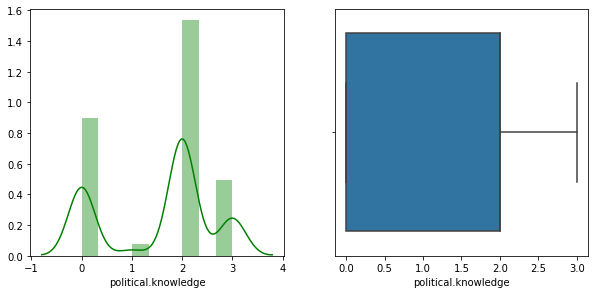

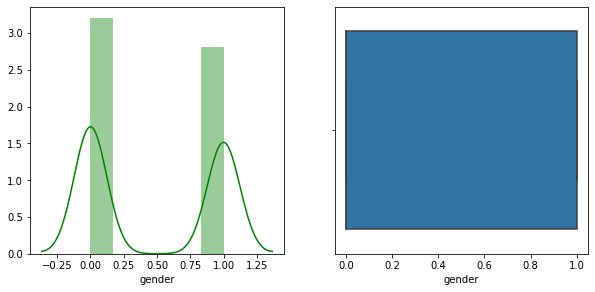

In [443]:
for feature in df.columns: 
    if feature != 'age':
        if feature != 'Europe':
            univariateAnalysis_numeric(feature,10)

# Bivariate analysis

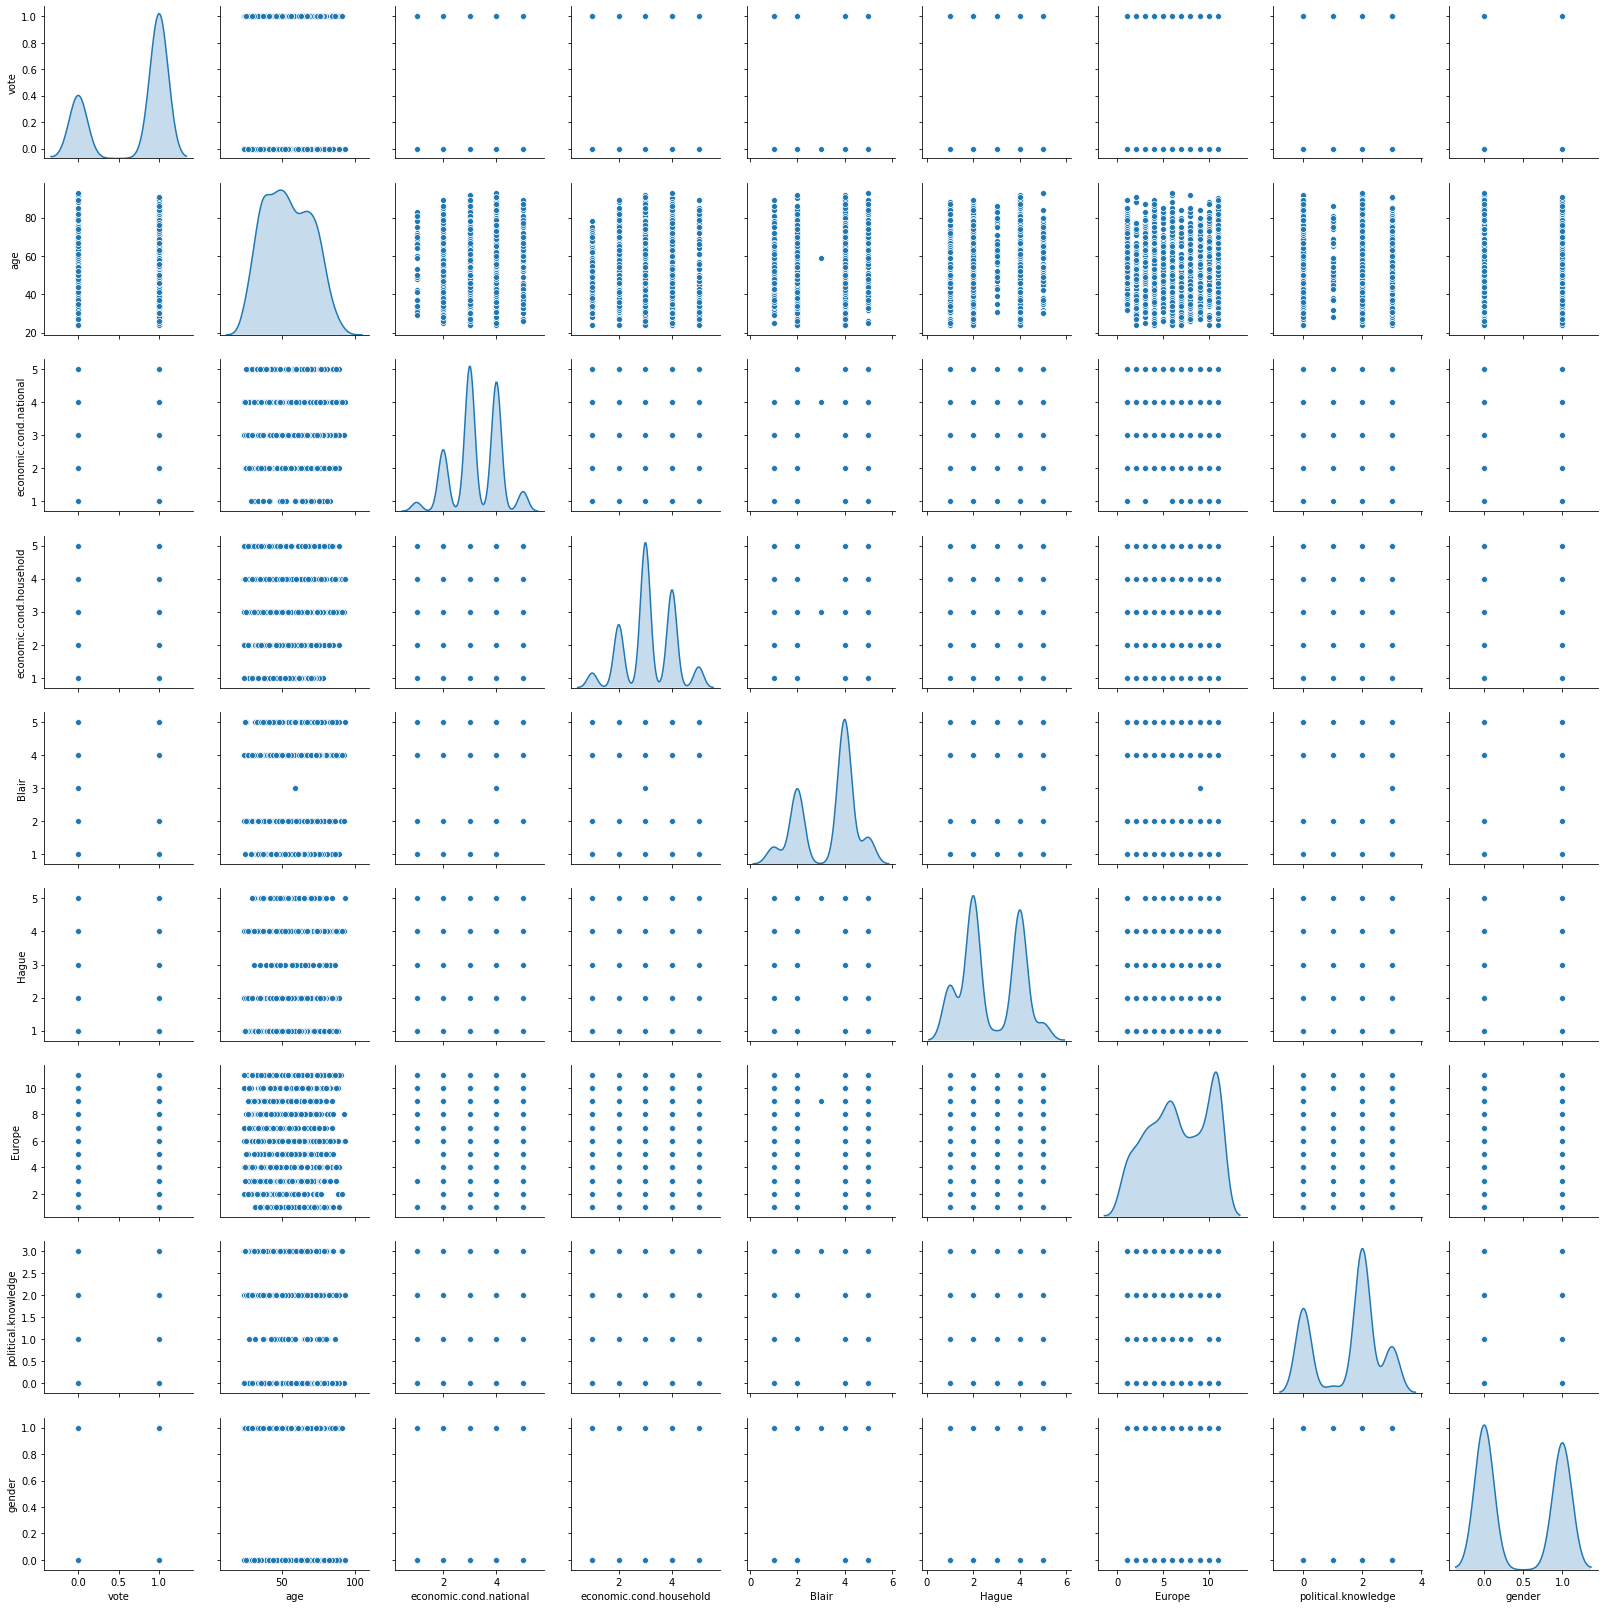

In [444]:
sns.pairplot(df,diag_kind='kde')

In [445]:
corr=df.corr()

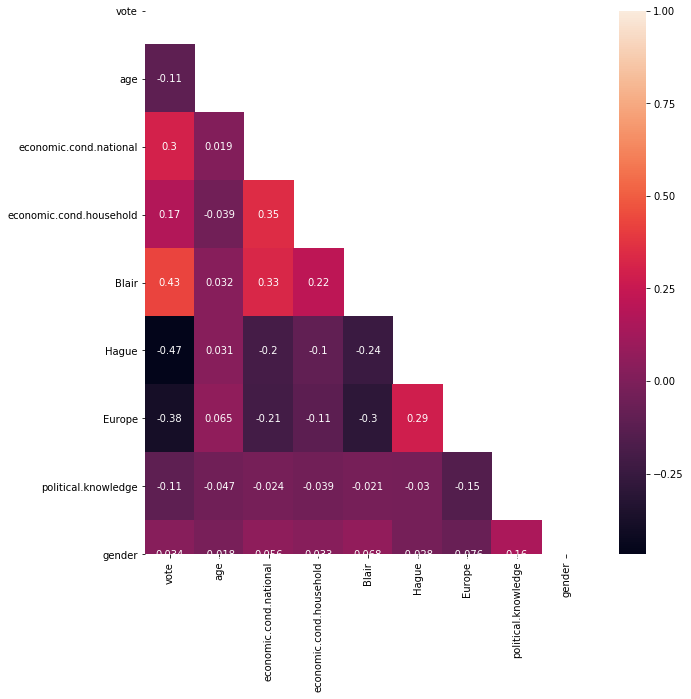

In [446]:
plt.figure(figsize=(10,10))
matrix = np.triu(corr)
sns.heatmap(corr,annot=True, fmt='.2g',mask=matrix)

Write the inferences foor Bivariate analysis

In [447]:
def outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3-Q1
    lr=Q1-(1.5*IQR)
    ur=Q3+(1.5*IQR)
    return lr,ur

In [448]:
l,u=outlier(df['economic.cond.household'])

In [449]:
df[df['economic.cond.household']<l]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
19,1,37,3,1,1,1,5,2,0
21,1,53,2,1,2,4,5,2,1
35,1,41,3,1,4,4,6,3,0
42,1,66,1,1,4,2,8,0,0
62,1,28,4,1,4,2,6,2,0
...,...,...,...,...,...,...,...,...,...
1469,0,70,1,1,2,5,11,2,1
1480,1,55,2,1,4,4,7,2,0
1493,1,34,3,1,4,2,6,2,0
1501,0,44,3,1,4,2,9,3,0


In [450]:
l,u=outlier(df['economic.cond.national'])
df[df['economic.cond.national']<l]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
39,0,72,1,3,2,2,11,2,0
42,1,66,1,1,4,2,8,0,0
57,1,32,1,2,1,4,1,2,1
91,0,49,1,1,2,4,8,3,0
105,1,60,1,3,1,4,8,0,0
109,1,31,1,1,2,4,11,0,1
159,1,67,1,3,2,4,11,0,0
165,0,53,1,3,1,4,6,2,1
215,0,34,1,1,1,4,11,3,1
291,0,60,1,2,2,5,11,2,0


In [451]:
df[df['economic.cond.national']<l].shape

(37, 9)

# 1.3. Encode the data (having string values) for Modelling. Is scaling necessary here or not? (2 pts), Data split: split the data into train and test (70:30)(2 pts). The learner is Expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std.dev, variance, etc. SHould justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(),pd.get_dummies(drop_first=T rue)) Data Split, ratio defined for the split, train test split should be discussed.


For Logistic regression and LDA there is no need of scaling as they are not distance based models. But for KNN model scaling is required as it is a distance based model.

In [452]:
X = df.drop('vote', axis=1)
y=df[['vote']]

In [453]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [454]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061, 1)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456, 1)


In [455]:
#scaling
from scipy.stats import zscore
df_scaled=df.drop('vote',axis=1).apply(zscore)
df_scaled.head().round(2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.72,-0.28,-0.15,0.57,-1.42,-1.44,0.42,-0.94
1,-1.16,0.86,0.93,0.57,1.01,-0.53,0.42,1.07
2,-1.23,0.86,0.93,1.42,-0.61,-1.13,0.42,1.07
3,-1.93,0.86,-1.22,-1.14,-1.42,-0.83,-1.42,-0.94
4,-0.84,-1.41,-1.22,-1.99,-1.42,-0.22,0.42,1.07


In [456]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,1.917458e-17,1.00033,-1.926617,-0.843577,-0.079079,0.812836,2.469250
economic.cond.national,1517.0,-1.984789e-16,1.00033,-2.547041,-0.278185,-0.278185,0.856242,1.990670
economic.cond.household,1517.0,-2.397189e-16,1.00033,-2.296796,-0.148020,-0.148020,0.926367,2.000755
Blair,1517.0,-1.034842e-16,1.00033,-1.988727,-1.137217,0.565802,0.565802,1.417312
Hague,1517.0,5.386448e-17,1.00033,-1.419969,-0.608329,-0.608329,1.014951,1.826592
Europe,1517.0,6.293947e-17,1.00033,-1.740556,-0.830902,-0.224465,0.988407,1.291625
political.knowledge,1517.0,-7.665442e-16,1.00033,-1.421084,-1.421084,0.423832,0.423832,1.346290
gender,1517.0,2.648581e-16,1.00033,-0.936736,-0.936736,-0.936736,1.067536,1.067536


# 1.4 Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [457]:
model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)
y_predict_log_test = model_logit.predict(X_test)
model_score = model_logit.score(X_test, y_test)
print('Logistic Regress Test aacuracy =',model_score)
print(metrics.confusion_matrix(y_test, y_predict_log_test))
print(metrics.classification_report(y_test, y_predict_log_test));

Logistic Regress Test aacuracy = 0.8333333333333334
[[ 91  47]
 [ 29 289]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       138
           1       0.86      0.91      0.88       318

    accuracy                           0.83       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



c:\app\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\app\Python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [458]:
y_predict_log_train = model_logit.predict(X_train)

In [459]:
#train & test accuracy
print('Logistic Regress Train aacuracy =',model_logit.score(X_train,y_train))
print('Logistic Regress test aacuracy =',model_logit.score(X_test,y_test))

Logistic Regress Train aacuracy = 0.8331762488218661
Logistic Regress test aacuracy = 0.8333333333333334


In [460]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_train,y_train)
model_lda

c:\app\Python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [461]:
y_predict_lda_test = model_lda.predict(X_test)
y_predict_lda_train = model_lda.predict(X_train)

In [462]:
#LDA
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict_lda_test)

array([[ 96,  42],
       [ 32, 286]], dtype=int64)

In [463]:
#LDA Accuracy for train & Test
print("LDA, Train accuracy =",model_logit.score(X_train, y_train))
print("LDA, Test Accuracy=",model_logit.score(X_test, y_test))

LDA, Train accuracy = 0.8331762488218661
LDA, Test Accuracy= 0.8333333333333334


In [464]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       138
           1       0.87      0.90      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



# 1.5. Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [465]:
#NAive
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
print(model_NB)
# make predictions
expected = y_test
predicted = model_NB.predict(X_test)
# summarize the fit of the model
print('Report on the test data')
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
Report on the test data
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       138
           1       0.86      0.87      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456

[[ 93  45]
 [ 40 278]]


c:\app\Python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [466]:
print('Report on the train data')
print(metrics.classification_report(y_train,model_NB.predict(X_train)))
print(metrics.confusion_matrix(y_train,model_NB.predict(X_train)))

Report on the train data
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       322
           1       0.88      0.88      0.88       739

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061

[[235  87]
 [ 85 654]]


As KNN model is a distance based learning algorithm, need to apply scaling for the data

In [467]:
#splitting scaled data
from sklearn.model_selection import train_test_split
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(df_scaled,y,test_size=0.3,random_state=100)

In [468]:
from sklearn.neighbors import KNeighborsClassifier
score=[]
for k in range (1,50):
    NNH = KNeighborsClassifier(n_neighbors=k, weights='distance')
    NNH.fit(X_train_scaled,y_train_scaled)
    score.append(NNH.score(X_test_scaled,y_test_scaled))

c:\app\Python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
c:\app\Python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
c:\app\Python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
c:\app\Python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
c:\app\Python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when 

In [469]:
MCE = [1 - x for x in score]
MCE

[0.2741228070175439,
 0.2741228070175439,
 0.2214912280701754,
 0.2214912280701754,
 0.20394736842105265,
 0.20833333333333337,
 0.20394736842105265,
 0.20833333333333337,
 0.19956140350877194,
 0.19736842105263153,
 0.1885964912280702,
 0.1907894736842105,
 0.1864035087719298,
 0.1842105263157895,
 0.18201754385964908,
 0.18201754385964908,
 0.18201754385964908,
 0.18201754385964908,
 0.17763157894736847,
 0.17543859649122806,
 0.17982456140350878,
 0.18201754385964908,
 0.17982456140350878,
 0.17324561403508776,
 0.17324561403508776,
 0.18201754385964908,
 0.17763157894736847,
 0.17763157894736847,
 0.1842105263157895,
 0.1842105263157895,
 0.1842105263157895,
 0.1842105263157895,
 0.18201754385964908,
 0.18201754385964908,
 0.17543859649122806,
 0.1842105263157895,
 0.17543859649122806,
 0.18201754385964908,
 0.18201754385964908,
 0.1842105263157895,
 0.18201754385964908,
 0.1842105263157895,
 0.17982456140350878,
 0.1842105263157895,
 0.17763157894736847,
 0.1864035087719298,
 0.18

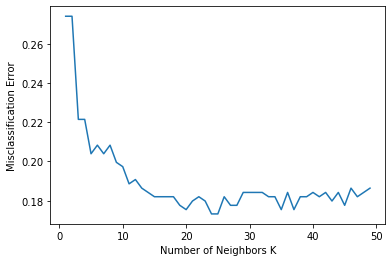

In [470]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,50), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [471]:
KNN_model=KNeighborsClassifier(n_neighbors=15,weights='distance')
KNN_model.fit(X_train_scaled,y_train_scaled)

c:\app\Python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [472]:
#train Data KNN
y_predict_knn_train = KNN_model.predict(X_train_scaled)
model_score_knn = KNN_model.score(X_train_scaled, y_train_scaled)
print(model_score_knn)
print(metrics.confusion_matrix(y_train_scaled, y_predict_knn_train))
print(metrics.classification_report(y_train_scaled, y_predict_knn_train))

1.0
[[322   0]
 [  0 739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [473]:
#test Data KNN
y_predict_knn_test = KNN_model.predict(X_test_scaled)
model_score_knn = KNN_model.score(X_test_scaled, y_test_scaled)
print(model_score_knn)
print(metrics.confusion_matrix(y_test_scaled, y_predict_knn_test))
print(metrics.classification_report(y_test_scaled, y_predict_knn_test))

0.8179824561403509
[[ 94  44]
 [ 39 279]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       138
           1       0.86      0.88      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



# 1.6 Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [474]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
clfRF=RandomForestClassifier(n_estimators=100, random_state=1)
clfRF.fit(X_train,y_train)
y_pred=clfRF.predict(X_test)
model_scoreRF = clfRF.score(X_test, y_test)
print(model_scoreRF)
print(metrics.confusion_matrix(y_test, y_pred))



0.8223684210526315
[[ 96  42]
 [ 39 279]]


c:\app\Python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [475]:
#Model tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 8],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)



In [476]:
grid_search.fit(X_train, y_train)

c:\app\Python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\app\Python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\app\Python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\app\Python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [477]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 501}

In [478]:
best_grid = grid_search.best_estimator_

In [479]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [480]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,ytrain_predict)

array([[188, 134],
       [ 53, 686]], dtype=int64)

In [481]:
confusion_matrix(y_test,ytest_predict)

array([[ 79,  59],
       [ 28, 290]], dtype=int64)

In [482]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67       322
           1       0.84      0.93      0.88       739

    accuracy                           0.82      1061
   macro avg       0.81      0.76      0.77      1061
weighted avg       0.82      0.82      0.82      1061



In [483]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.57      0.64       138
           1       0.83      0.91      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.74      0.76       456
weighted avg       0.80      0.81      0.80       456



In [484]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

c:\app\Python37\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [485]:
## Performance Matrix on train data set
y_train_predict_bag = Bagging_model.predict(X_train)
model_score_bag =Bagging_model.score(X_train, y_train)
print(model_score_bag)
print(metrics.confusion_matrix(y_train, y_train_predict_bag))
print(metrics.classification_report(y_train, y_train_predict_bag))

1.0
[[322   0]
 [  0 739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [486]:
## Performance Matrix on test data set
y_test_predict_bag = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_bag))
print(metrics.classification_report(y_test, y_test_predict_bag))

0.8026315789473685
[[ 99  39]
 [ 51 267]]
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       138
           1       0.87      0.84      0.86       318

    accuracy                           0.80       456
   macro avg       0.77      0.78      0.77       456
weighted avg       0.81      0.80      0.80       456



In [487]:
#Adaboosting
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

c:\app\Python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [488]:
## Performance Matrix on train data set
y_train_predict_ada = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_ada))
print(metrics.classification_report(y_train, y_train_predict_ada))

0.8463713477851084
[[227  95]
 [ 68 671]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [489]:
## Performance Matrix on test data set
y_test_predict_ada = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_ada))
print(metrics.classification_report(y_test, y_test_predict_ada))

0.8157894736842105
[[ 91  47]
 [ 37 281]]
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       138
           1       0.86      0.88      0.87       318

    accuracy                           0.82       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



In [490]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

c:\app\Python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [491]:
## Performance Matrix on train data set
y_train_predict_gbcl = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_gbcl))
print(metrics.classification_report(y_train, y_train_predict_gbcl))

0.8934967012252591
[[255  67]
 [ 46 693]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       322
           1       0.91      0.94      0.92       739

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [492]:
## Performance Matrix on test data set
y_test_predict_gbcl = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_gbcl))
print(metrics.classification_report(y_test, y_test_predict_gbcl))

0.8223684210526315
[[ 94  44]
 [ 37 281]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       138
           1       0.86      0.88      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

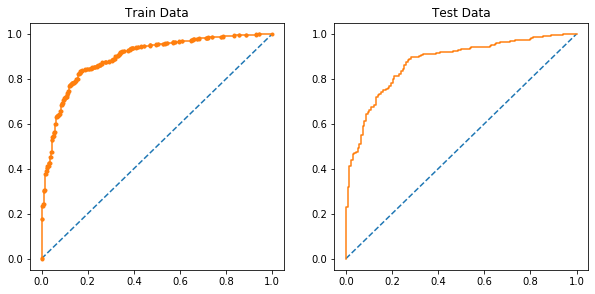

In [495]:
#ROC_Log_regression
#ROC Logistics
# Train
probs_logit_train = model_logit.predict_proba(X_train)
probs_logit_train = probs_logit_train[:, 1]
plt.figure(figsize=(10,10))
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs_logit_train)
plt.subplot(221)
plt.title('Train Data')

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

#Test
probs_logit_test = model_logit.predict_proba(X_test)
probs_logit_test = probs_logit_test[:, 1]
plt.subplot(222)
plt.title('Test Data')
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs_logit_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


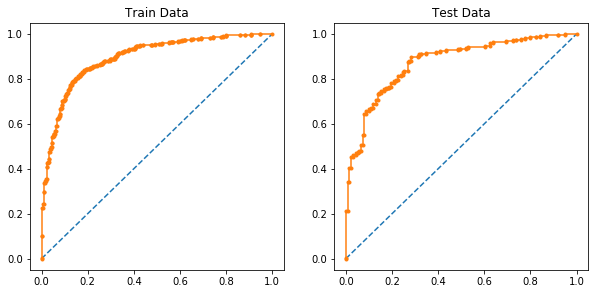

In [496]:
#ROC LDA
# Train
pred_prob_train = model_lda.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


pred_prob_test = model_lda.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

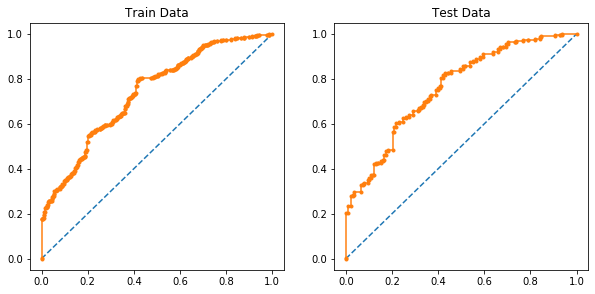

In [497]:
#ROC KNN
# Train
pred_prob_train = KNN_model.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

#Test
pred_prob_test = KNN_model.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

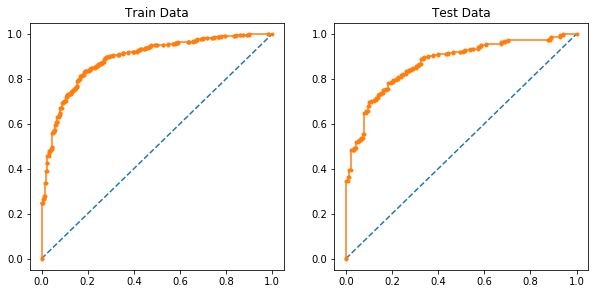

In [498]:
#ROC Naive Bayes
# Train
pred_prob_train = model_NB.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

#Test
pred_prob_test = model_NB.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

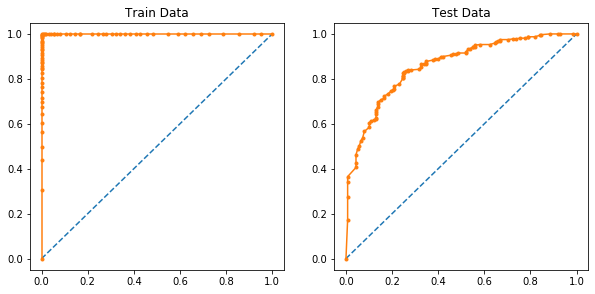

In [499]:
#ROC Bagging
# Train
pred_prob_train = Bagging_model.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

#Test
pred_prob_test = Bagging_model.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

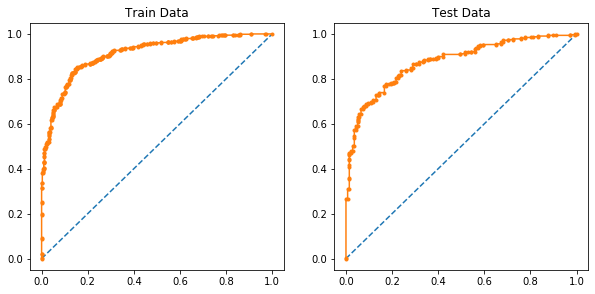

In [500]:
#ROC Adaboost
# Train
pred_prob_train = ADB_model.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

#Test
pred_prob_test = ADB_model.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

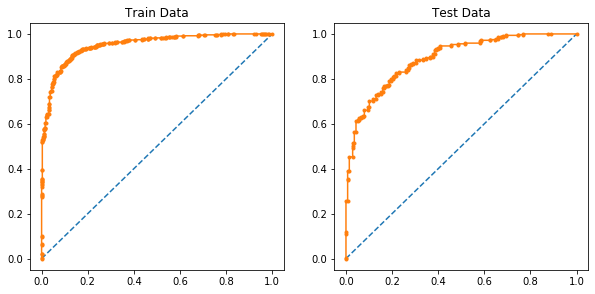

In [501]:
#ROC Gradientboost
# Train
pred_prob_train = gbcl.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

#Test
pred_prob_test = gbcl.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

In [539]:
#AUC Logistic

pred_prob_train = model_logit.predict_proba(X_train)
pred_prob_train[:,1]
auc_log_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])

pred_prob_test = model_logit.predict_proba(X_test)
pred_prob_test[:,1]
auc_log_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])

#AUC LDA
pred_prob_train = model_lda.predict_proba(X_train)
pred_prob_train[:,1]
auc_lda_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])

pred_prob_test = model_lda.predict_proba(X_test)
pred_prob_test[:,1]
auc_lda_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])

#AUC KNN
pred_prob_train = KNN_model.predict_proba(X_train)
pred_prob_train[:,1]
auc_knn_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])

pred_prob_test = KNN_model.predict_proba(X_test)
pred_prob_test[:,1]
auc_knn_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])

#AUC Naive Bayes
pred_prob_train = model_NB.predict_proba(X_train)
pred_prob_train[:,1]
auc_nb_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])

pred_prob_test = model_NB.predict_proba(X_test)
pred_prob_test[:,1]
auc_nb_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])

#AUC Bagging
pred_prob_train = Bagging_model.predict_proba(X_train)
pred_prob_train[:,1]
auc_bag_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])


pred_prob_test = Bagging_model.predict_proba(X_test)
pred_prob_test[:,1]
auc_bag_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])

#AUC Adaboost
pred_prob_train = ADB_model.predict_proba(X_train)
pred_prob_train[:,1]
auc_ada_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])

pred_prob_test = ADB_model.predict_proba(X_test)
pred_prob_test[:,1]
auc_ada_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])

#AUC gradientboosting
pred_prob_train = gbcl.predict_proba(X_train)
pred_prob_train[:,1]
auc_grd_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])


pred_prob_test = gbcl.predict_proba(X_test)
pred_prob_test[:,1]
auc_grd_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])

#Randomforest
pred_prob_train = grid_search.predict_proba(X_train)
pred_prob_train[:,1]
auc_ran_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])

pred_prob_test = grid_search.predict_proba(X_test)
pred_prob_train[:,1]
auc_ran_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])




In [540]:
df_auc=pd.DataFrame(index=['Logistic Regression','LDA','KNN','Naive Bayes','Bagging','Ada Boosting','Gradient Boostin','Random Forest'],columns=['AUC_TEST','AUC_TRAIN'])

In [541]:
df_auc['AUC_TEST']=[auc_log_test,auc_lda_test,auc_knn_test,auc_nb_test,auc_bag_test,auc_ada_test,auc_grd_test,auc_ran_test]

In [542]:
df_auc['AUC_TRAIN']=[auc_log_train,auc_lda_train,auc_knn_train,auc_nb_train,auc_bag_train,auc_ada_train,auc_grd_train,auc_ran_train]

In [543]:
df_auc

,AUC_TEST,AUC_TRAIN
Logistic Regression,0.873849,0.894263
LDA,0.874054,0.894557
KNN,0.760642,0.738630
Naive Bayes,0.870499,0.890829
Bagging,0.859060,1.000000
Ada Boosting,0.876379,0.913777
Gradient Boostin,0.891282,0.951065
Random Forest,0.870796,0.889151


([<matplotlib.axis.YTick at 0x2d325d1e488>,
 <a list of 2 Text yticklabel objects>)

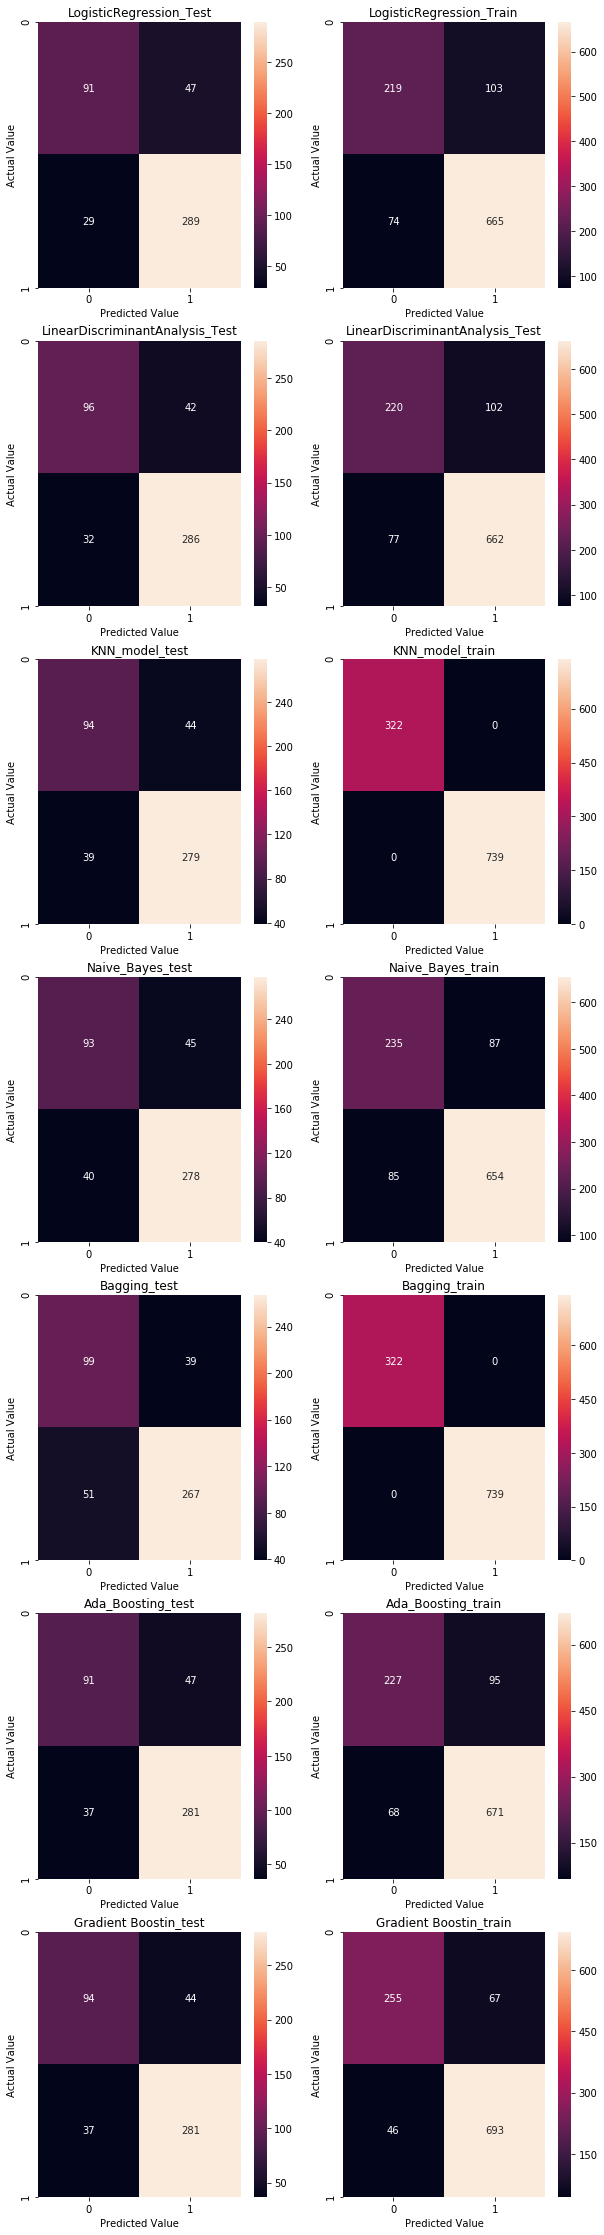

In [513]:
plt.figure(figsize=(10,40))
plt.subplot(721)
plt.title('LogisticRegression_Test')
sns.heatmap(confusion_matrix(y_test, y_predict_log_test),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(722)
plt.title('LogisticRegression_Train')
sns.heatmap(confusion_matrix(y_train, y_predict_log_train),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(723)
plt.title('LinearDiscriminantAnalysis_Test')
sns.heatmap(confusion_matrix(y_test,y_predict_lda_test),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(724)
plt.title('LinearDiscriminantAnalysis_Test')
sns.heatmap(confusion_matrix(y_train,y_predict_lda_train),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(725)
plt.title('KNN_model_test')
sns.heatmap(confusion_matrix(y_test_scaled, y_predict_knn_test),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(726)
plt.title('KNN_model_train')
sns.heatmap(confusion_matrix(y_train_scaled, y_predict_knn_train),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(727)
plt.title('Naive_Bayes_test')
sns.heatmap(confusion_matrix(y_test,model_NB.predict(X_test)),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(728)
plt.title('Naive_Bayes_train')
sns.heatmap(confusion_matrix(y_train,model_NB.predict(X_train)),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(729)
plt.title('Bagging_test')
sns.heatmap(confusion_matrix(y_test, y_test_predict_bag),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(7,2,10)
plt.title('Bagging_train')
sns.heatmap(confusion_matrix(y_train, y_train_predict_bag),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(7,2,11)
plt.title('Ada_Boosting_test')
sns.heatmap(confusion_matrix(y_test, y_test_predict_ada),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(7,2,12)
plt.title('Ada_Boosting_train')
sns.heatmap(confusion_matrix(y_train, y_train_predict_ada),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(7,2,13)
plt.title('Gradient Boostin_test')
sns.heatmap(confusion_matrix(y_test, y_test_predict_gbcl),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])
plt.subplot(7,2,14)
plt.title('Gradient Boostin_train')
sns.heatmap(confusion_matrix(y_train, y_train_predict_gbcl),annot=True,fmt='.6g')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.yticks([0,2])




# Problem 2
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

In [514]:
import numpy as np
import pandas as pd
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import random
import string # this is used for string manipulations

from nltk.corpus import inaugural

## 2.1 Find the number of characters, words, and sentences for the mentioned documents. 

In [515]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('inaugural')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\z0126520\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\z0126520\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\z0126520\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [516]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [517]:
len(inaugural.fileids()) # Checking the length/no. fileids

59

In [518]:
roose=inaugural.raw('1941-Roosevelt.txt') #storing the text data in variable

In [519]:
ken=inaugural.raw('1961-Kennedy.txt')
ken

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [520]:
nix=inaugural.raw('1973-Nixon.txt')
nix

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [521]:
#remove punctuation
import string
reg_punct= list(string.punctuation)
reg_punct.append('--')
reg_punct.append('."')
def remove_punct(text,punct_list):
    for punct in punct_list:
        if punct in text:
            text = text.replace(punct, ' ')
    return text.strip()
a=remove_punct(roose,reg_punct)
b=remove_punct(ken,reg_punct)
c=remove_punct(nix,reg_punct)


In [522]:
char_count = [len(roose),len(ken),len(nix)]
word_count = [len(a.split()),len(b.split()),len(c.split())]
sent_count = [len(inaugural.sents('1941-Roosevelt.txt')),len(inaugural.sents('1961-Kennedy.txt')),len(inaugural.sents('1973-Nixon.txt'))]

In [523]:
df1= pd.DataFrame(index=['1941-Roosevelt','1961-Kennedy','1973-Nixon'])

In [524]:
df1['char_count']=char_count
df1['word_count']=word_count
df1['sent_count']=sent_count

In [525]:
df1

,char_count,word_count,sent_count
1941-Roosevelt,7571,1350,68
1961-Kennedy,7618,1370,52
1973-Nixon,9991,1819,69


# 2.2 Remove all the stopwords from all three speeches.

In [526]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords.append('--')
stopwords.append('."')

In [527]:
# Converting all the words to lower case
low_roose = (w.lower() for w in inaugural.words('1941-Roosevelt.txt')) 
# Only keeping the words which are not the 'stopwords'
roose_clean = [word for word in low_roose if word not in stopwords]

In [528]:
roose_clean

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplai

In [529]:
# Converting all the words to lower case
low_ken = (w.lower() for w in inaugural.words('1961-Kennedy.txt')) 
# Only keeping the words which are not the 'stopwords'
ken_clean = [word for word in low_ken if word not in stopwords]
ken_clean

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alike'

In [530]:
# Converting all the words to lower case
low_nix = (w.lower() for w in inaugural.words('1973-Nixon.txt')) 
# Only keeping the words which are not the 'stopwords'
nix_clean = [word for word in low_nix if word not in stopwords]
nix_clean

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',


# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

In [531]:
nltk.FreqDist(roose_clean)

FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

In [532]:
nltk.FreqDist(ken_clean)

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

In [533]:
nltk.FreqDist(nix_clean)

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, ...})

# 2.4. Plot the word cloud of each of the three speeches. (after removing the stopwords)

Word Cloud for Apple_Tweets (after cleaning)!!


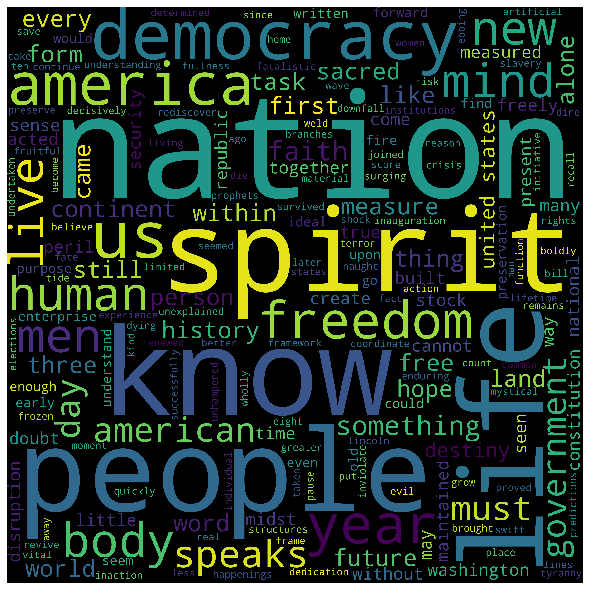

In [534]:
# Word Cloud 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100,stopwords=stopwords).generate(str(a.lower())) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

Word Cloud for Apple_Tweets (after cleaning)!!


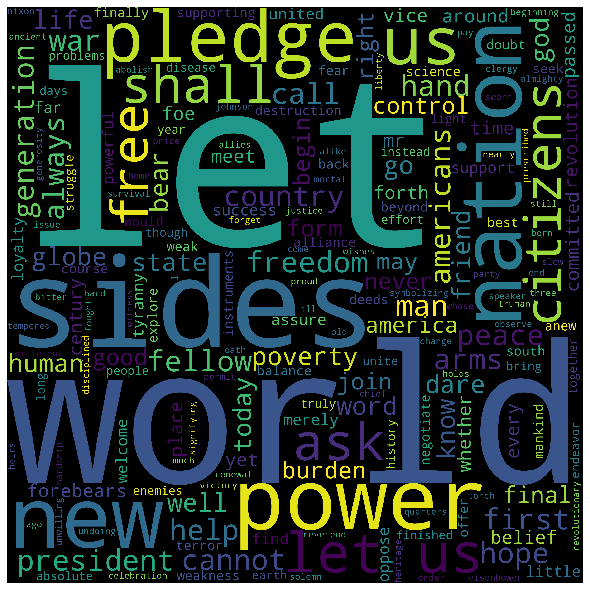

In [535]:
# Word Cloud 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100,stopwords=stopwords).generate(str(b.lower())) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

Word Cloud for Apple_Tweets (after cleaning)!!


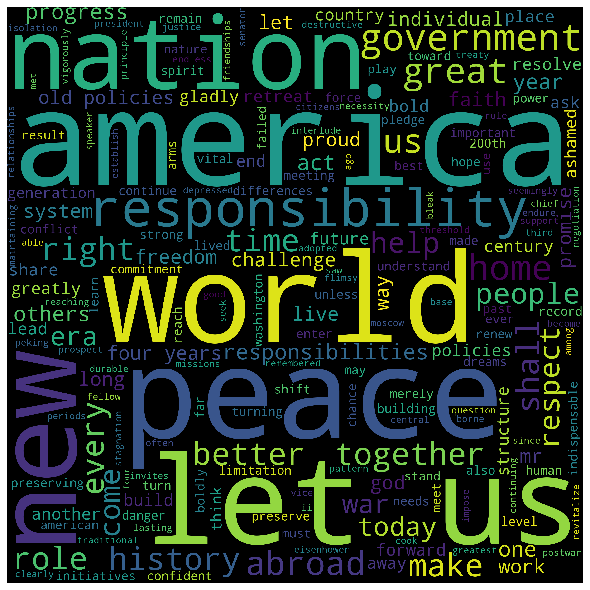

In [536]:
# Word Cloud 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100,stopwords=stopwords).generate(str(c.lower())) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!